### 1. Pandas Revision 

In [1]:
import pandas as pd
import numpy as np

#### Series 

In [2]:
# initializing a series as a dictionary
indices = ['a', 'b', 'c']
data = [10,20,30]
s1 = pd.Series(data, indices)

print(s1)

a    10
b    20
c    30
dtype: int64


In [3]:
s2 = pd.Series(data)
s2

0    10
1    20
2    30
dtype: int64

In [4]:
s3 = pd.Series({'a':10, 'b':20, 'c':30}) # you can initialise series via a dictionary
s3

a    10
b    20
c    30
dtype: int64

In [5]:
# operations 
s1['a'] = s1['a'] ** 3 
s1

a    1000
b      20
c      30
dtype: int64

In [6]:
s1 + s3

a    1010
b      40
c      60
dtype: int64

In [7]:
s1.sum()

1050

In [8]:
s1.product()

600000

#### Dataframes 
* 2 dimensional, mutable, heterogenous tabular data

In [9]:
# Initialise a random dataframe 
df = pd.DataFrame(np.random.rand(3,5),
                  ['A', 'B', 'C'], 
                  ['price', 'volume', 'return', 'open', 'close'])
df

,price,volume,return,open,close
A,0.130835,0.291221,0.680487,0.821946,0.229752
B,0.273785,0.884494,0.858684,0.052018,0.257478
C,0.179925,0.493599,0.930670,0.054259,0.052561


In [10]:
# select column
df['price'] 

A    0.130835
B    0.273785
C    0.179925
Name: price, dtype: float64

In [11]:
df.loc['A'] # selecting row by label

price     0.130835
volume    0.291221
return    0.680487
open      0.821946
close     0.229752
Name: A, dtype: float64

* when to use .loc[ ] vs .iloc[ ]?

loc accesses rows and columns using label(s), while iloc uses purely integer-location based indexing  

In [12]:
df.iloc[0]

price     0.130835
volume    0.291221
return    0.680487
open      0.821946
close     0.229752
Name: A, dtype: float64

In [13]:
df['volume']['C']

0.49359872503296554

In [14]:
df.loc['C', 'volume'] # an alternative of the above 

0.49359872503296554

In [15]:
df.iloc[2,1] # an alternative of the alternative 

0.49359872503296554

* multi-dimensional hierarchical indexing (MultiIndex for rows)

In [16]:
out = ['CAN', 'CAN', 'CAN', 'FR', 'FR', 'FR', 'USA', 'USA', 'USA']
inside = ['MORNING', 'MIDDAY', 'EVENING', 'MORNING', 'MIDDAY', 'EVENING', 'MORNING', 'MIDDAY', 'EVENING']
idxzip = zip(out, inside)
indexRows = pd.MultiIndex.from_tuples(idxzip)
df2 = pd.DataFrame(np.random.rand(9,3), indexRows, ['price', 'close', 'open'])
df2

price     close      open
CAN MORNING  0.373877  0.382469  0.437193
    MIDDAY   0.633608  0.159775  0.679899
    EVENING  0.809202  0.768102  0.419988
FR  MORNING  0.401912  0.192265  0.633080
    MIDDAY   0.425987  0.038825  0.448019
    EVENING  0.112195  0.321491  0.599941
USA MORNING  0.643626  0.618702  0.094595
    MIDDAY   0.542354  0.651810  0.573152
    EVENING  0.539010  0.040329  0.191060

In [17]:
df2.loc['CAN', 'MORNING']['price'] # accessing values 

0.3738771249841858

* boolean operations

In [18]:
df

,price,volume,return,open,close
A,0.130835,0.291221,0.680487,0.821946,0.229752
B,0.273785,0.884494,0.858684,0.052018,0.257478
C,0.179925,0.493599,0.930670,0.054259,0.052561


In [19]:
df[df>0.5]

,price,volume,return,open,close
A,NaN,NaN,0.680487,0.821946,NaN
B,NaN,0.884494,0.858684,NaN,NaN
C,NaN,NaN,0.930670,NaN,NaN


In [20]:
df[(df < 0.3) | (df > 0.9)] # | == "OR" bitwise operator

,price,volume,return,open,close
A,0.130835,0.291221,NaN,NaN,0.229752
B,0.273785,NaN,NaN,0.052018,0.257478
C,0.179925,NaN,0.93067,0.054259,0.052561


In [21]:
df[(df > 0.3) & (df < 0.9)] 

,price,volume,return,open,close
A,NaN,NaN,0.680487,0.821946,NaN
B,NaN,0.884494,0.858684,NaN,NaN
C,NaN,0.493599,NaN,NaN,NaN


* DataFrame commands/methods

In [22]:
np.random.rand(9)

array([0.12334204, 0.63324712, 0.26684633, 0.316707  , 0.29601704,
       0.75041495, 0.12314897, 0.0019414 , 0.80231409])

In [23]:
dictionary = {'Country' : ['UK', 'UK', 'FR', 'FR', 'CAN', 'CAN', 'USA', 'USA'],
              'Stock Price' : np.random.rand(8)*100, 
              'Sales' : np.random.rand(8)*100, 
}
df = pd.DataFrame(dictionary)

In [24]:
df

,Country,Stock Price,Sales
0,UK,89.586434,66.065700
1,UK,10.409090,35.286965
2,FR,85.681435,38.212725
3,FR,76.322254,17.879113
4,CAN,38.183973,93.284749
5,CAN,16.737404,28.048822
6,USA,51.826178,96.315842
7,USA,19.295380,7.557785


In [25]:
df.info() # concise info on index dtype, columns, non-null values, memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      8 non-null      object 
 1   Stock Price  8 non-null      float64
 2   Sales        8 non-null      float64
dtypes: float64(2), object(1)
memory usage: 320.0+ bytes


In [26]:
df.describe() # generate summary statistics of all columns

,Stock Price,Sales
count,8.000000,8.000000
mean,48.505268,47.831463
std,32.237523,33.614566
min,10.409090,7.557785
25%,18.655886,25.506395
50%,45.005076,36.749845
75%,78.662049,72.870462
max,89.586434,96.315842


In [27]:
df.describe().loc['min', 'Sales'] # you can select the same way you do with normal dataframes

7.55778462315273

In [28]:
df.groupby('Country').describe().T # groupby - split dataframes into columns based on argument passed. T - transpose

Country                  CAN         FR         UK        USA
Stock Price count   2.000000   2.000000   2.000000   2.000000
            mean   27.460689  81.001845  49.997762  35.560779
            std    15.165015   6.617940  55.986837  23.002747
            min    16.737404  76.322254  10.409090  19.295380
            25%    22.099046  78.662049  30.203426  27.428080
            50%    27.460689  81.001845  49.997762  35.560779
            75%    32.822331  83.341640  69.792098  43.693478
            max    38.183973  85.681435  89.586434  51.826178
Sales       count   2.000000   2.000000   2.000000   2.000000
            mean   60.666786  28.045919  50.676333  51.936813
            std    46.128766  14.378035  21.763852  62.761424
            min    28.048822  17.879113  35.286965   7.557785
            25%    44.357804  22.962516  42.981649  29.747299
            50%    60.666786  28.045919  50.676333  51.936813
            75%    76.975768  33.129322  58.371016  74.126328
            max    93.284749  38.212725  66.065700  96.315842

In [29]:
df.groupby('Country').max()

,Stock Price,Sales
Country,,
CAN,38.183973,93.284749
FR,85.681435,38.212725
UK,89.586434,66.065700
USA,51.826178,96.315842


* Concatenation and Merging 

In [30]:
df1 = pd.DataFrame({'A': [1,2,3,4],
                    'B': [10,20,30,40],
                    'C': [100,200,300,400]})
df2 = pd.DataFrame({'A': [5,6,7,8],
                    'B': [50,60,70,80],
                    'C': [500,600,700,800]})
df3 = pd.DataFrame({'A': [9,10,11,12],
                    'B': [90,100,110,120],
                    'C': [900,1000,1100,1200]})

In [31]:
big_df = pd.concat([df1, df2, df3], axis=1) #pd.concat does not join based on any common row/column
big_df

,A,B,C,A,B,C,A,B,C
0,1,10,100,5,50,500,9,90,900
1,2,20,200,6,60,600,10,100,1000
2,3,30,300,7,70,700,11,110,1100
3,4,40,400,8,80,800,12,120,1200


In [33]:
big_df = pd.concat([df1, df2, df3], axis=0)
big_df

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400
0,5,50,500
1,6,60,600
2,7,70,700
3,8,80,800
0,9,90,900
1,10,100,1000


In [34]:
df1 = pd.DataFrame({'A': [1,2,3,4],
                    'B': [10,20,30,40],
                    'C': [100,200,300,400]})
df2 = pd.DataFrame({'C': [100,200,300,400],
                    'D': [5,6,7,8],
                    'E': [50,60,70,80]})

In [35]:
pd.concat([df1,df2], axis=1)

,A,B,C,C,D,E
0,1,10,100,100,5,50
1,2,20,200,200,6,60
2,3,30,300,300,7,70
3,4,40,400,400,8,80


In [36]:
pd.merge(df1,df2) # .merge() joins dataframes based on common column or index

,A,B,C,D,E
0,1,10,100,5,50
1,2,20,200,6,60
2,3,30,300,7,70
3,4,40,400,8,80


* unique values 

In [37]:
df = pd.DataFrame({'a': [1,2,3,4],
                    'b': [5,5,5,5],
                    'c': [6,7,8,9]})
df

,a,b,c
0,1,5,6
1,2,5,7
2,3,5,8
3,4,5,9


In [38]:
df.loc[:, 'c'].nunique() 

4

In [39]:
df['c'].value_counts()

6    1
7    1
8    1
9    1
Name: c, dtype: int64

In [40]:
df.nunique()

a    4
b    1
c    4
dtype: int64

* Functions in DataFrames 

In [41]:
def multiplyThree(x):
    return x*3

multiplyThree(df)

,a,b,c
0,3,15,18
1,6,15,21
2,9,15,24
3,12,15,27


In [42]:
multiplyThree(df['c'])

0    18
1    21
2    24
3    27
Name: c, dtype: int64

In [43]:
df.apply(multiplyThree)

,a,b,c
0,3,15,18
1,6,15,21
2,9,15,24
3,12,15,27


lambda functions
- useful if you just want to apply a function once / useful for functions that only contains simple expressions i.e: only one statement

In [44]:
df['b'].apply(lambda x:x**2 + 1) # lambda functions are "anon" defined as := <argument(s)> : <expression>

0    26
1    26
2    26
3    26
Name: b, dtype: int64

* remove rows/columns

In [45]:
df.drop('b', axis=1) # column-based need to specify

,a,c
0,1,6
1,2,7
2,3,8
3,4,9


In [48]:
df.drop(3) # index-based

,a,b
0,1,5
1,2,5
2,3,5


In [47]:
df.drop('c', axis=1, inplace=True) # if inplace = False return copy, else do operation in place and return none
df

,a,b
0,1,5
1,2,5
2,3,5
3,4,5


* Visualisation

In [49]:
df = pd.DataFrame(np.random.rand(100,2), columns=['A', 'B'])

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
df

,A,B
0,0.238198,0.062848
1,0.817384,0.306279
2,0.245911,0.152875
3,0.501537,0.729790
4,0.063901,0.523029
...,...,...
95,0.494754,0.445088
96,0.081028,0.965625
97,0.601510,0.715701
98,0.474421,0.795890


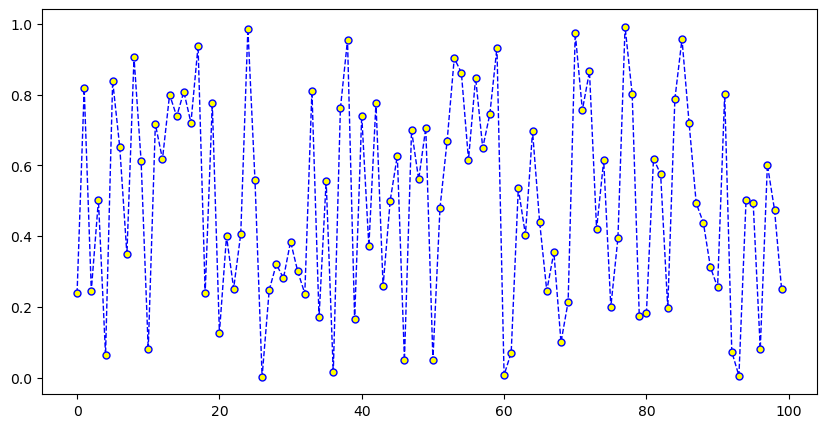

In [51]:
plt.figure(figsize=(10,5))
plt.plot(df['A'], linestyle='--', color='blue', linewidth=1, marker='.', 
             markersize=10, markerfacecolor='yellow');

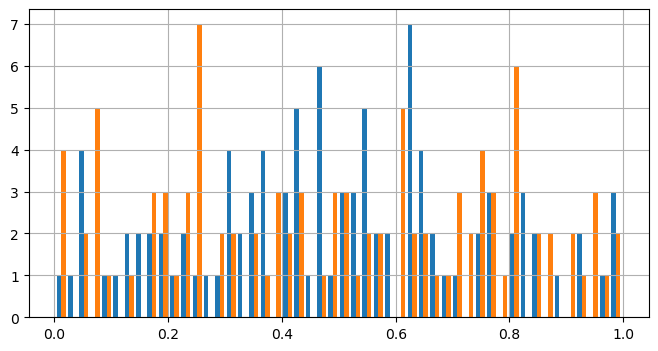

In [57]:
df2 = pd.DataFrame(np.random.rand(100,2))
plt.figure(figsize=(8,4))
plt.hist([df2[1], df['A']], bins=50); # note the 2 parameters passed in df2 and df['A']
plt.grid()

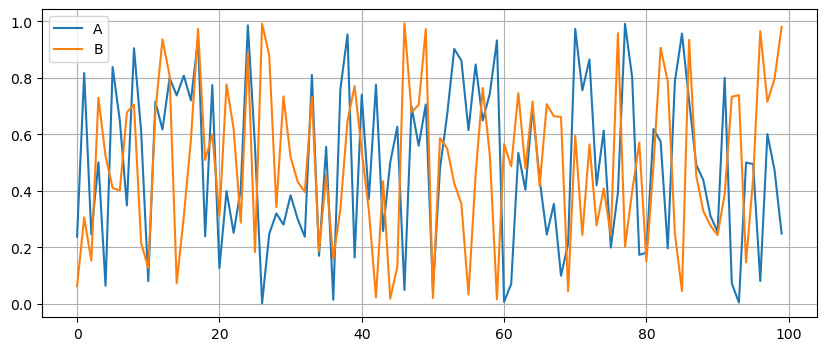

In [58]:
plt.figure(figsize=(10,4))
plt.plot('A', data=df)
plt.plot('B', data=df)
plt.legend()
plt.grid()
plt.show();

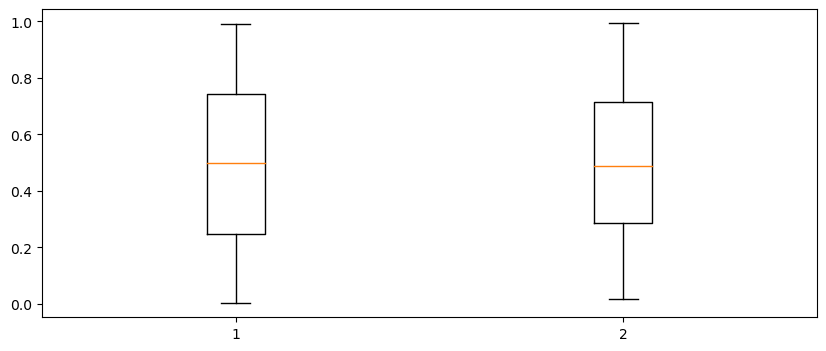

In [59]:
plt.figure(figsize=(10,4))
plt.boxplot(df);

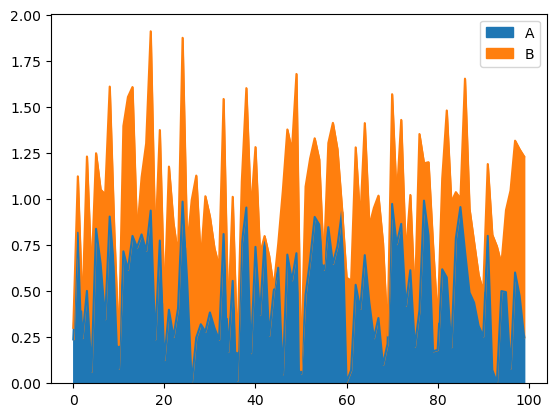

In [60]:
df.plot.area();